## <span style="color:green"> Laboratorio di simulazione numerica </span>
### Martina Colombo, 977556
## <span style="color:blue">  Esercitazione 10</span>

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

In [ ]:
from adjustText import adjust_text
from celluloid import Camera

### Esercizio 10.1

In questo esercizio adattiamo il codice dell'Algoritmo Genetico sviluppato nell'Esercitazione 9 per risolvere il problema del commesso viaggiatore, integrando l'algoritmo del Simulated Annealing. Il Simulated Annealing è un algoritmo utilizzato per risolvere problemi di ottimizzazione che ha una forte analogia con la termodinamica. Le molecole di un liquido a temperatura $T$ sono libere di muoversi, se la temperatura viene abbassata lentamente le molecole perdono pian piano la loro mobilità termica fino ad arrivare ad uno stato in cui queste sono perfettamente ordinate a formare un cristallo. Lo stato cristallino rappresenta lo stato ad energia minima, ed è proprio quello che il Simulated Annealing ha lo scopo di trovare. La strategia adottata dall'algoritmo è quella di considerare un sistema ad una data temperatura iniziale, abbassare la temperatura lentamente in modo tale da non rimanere intrappolati in minimi locali, fino a raggiungere auspicabilmente il minimo globale in corrispondenza della temperatura minima. Man mano che la temperatura cambia l'algoritmo campiona la nuova conformazione proposta tramite il peso di Boltzmann e decide, tramite lo schema dell'algoritmo di Metropolis, se accettare o meno la mossa proposta. Ci aspettiamo che il rate di accettazione del Metropolis diminuisca con il diminuire della temperatura. 


Per applicare il Simulated Annealing al caso dell'algoritmo genetico consideriamo un solo cromosoma, partiamo da una certa temperatura iniziale che nel nostro caso è posta a $T_i =15$ e la diminuiamo di volta in volta di un valore pari a $\delta t=0.015$. Per ogni valore della temperatura facciamo evolvere il cromosoma tramite gli operatori di mutazione per un numero totale di $t_{tries}=7000$ volte. Gli operatori di mutazione che abbiamo implementato nell'algoritmo genetico vengono considerati ora come mosse da proporre per far evolvere il cromosoma che devono essere valutate tramite l'algoritmo di Metropolis. Il peso statistico di Boltzmann che campioniamo in questo caso dipende dalla funzione costo, ovvero dalla norma al quadrato delle distanze $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ dei geni. Le posizioni dei geni che formano il cromosoma sono le stesse utilizzate nell'Esercitazione 9 così da poter fare un confronto tra i due metodi. Scegliamo di aumentare la probabilità con cui vengono chiamati gli operatori di mutazione perché in questo caso non abbiamo la presenza del crossover.


Applichiamo infine il codice al caso di:

- 32 geni posti in una circonferenza unitaria 
- 32 geni posti in un quadrato di lato 2

##### Città poste nella circonferenza 

Riportiamo di seguito i grafici ottenuti analizzando il caso di geni posti all'interno di una circonferenza unitaria. Il primo grafico mostra il valore del modulo quadro della distanza istantanea in funzione del numero delle iterazioni totali $\#_{iteration}$ ottenute con l'algoritmo del Simulated Annealing confrontato con la distanza migliore finale ottenuta tramite l'Algoritmo Genetico. Vediamo che il percorso migliore ottenuto dal Simulated Annealing converge a quello dell'Algoritmo Genetico. Nel secondo grafico vediamo che il valore del modulo quadro della distanza diminuisce con la temperatura, questo indica che effettivamente l'algoritmo sta ottimizzando la distanza. Nell'ultimo grafico vediamo che il rate di accettazione diminuisce con la temperatura come ci aspettavamo. 

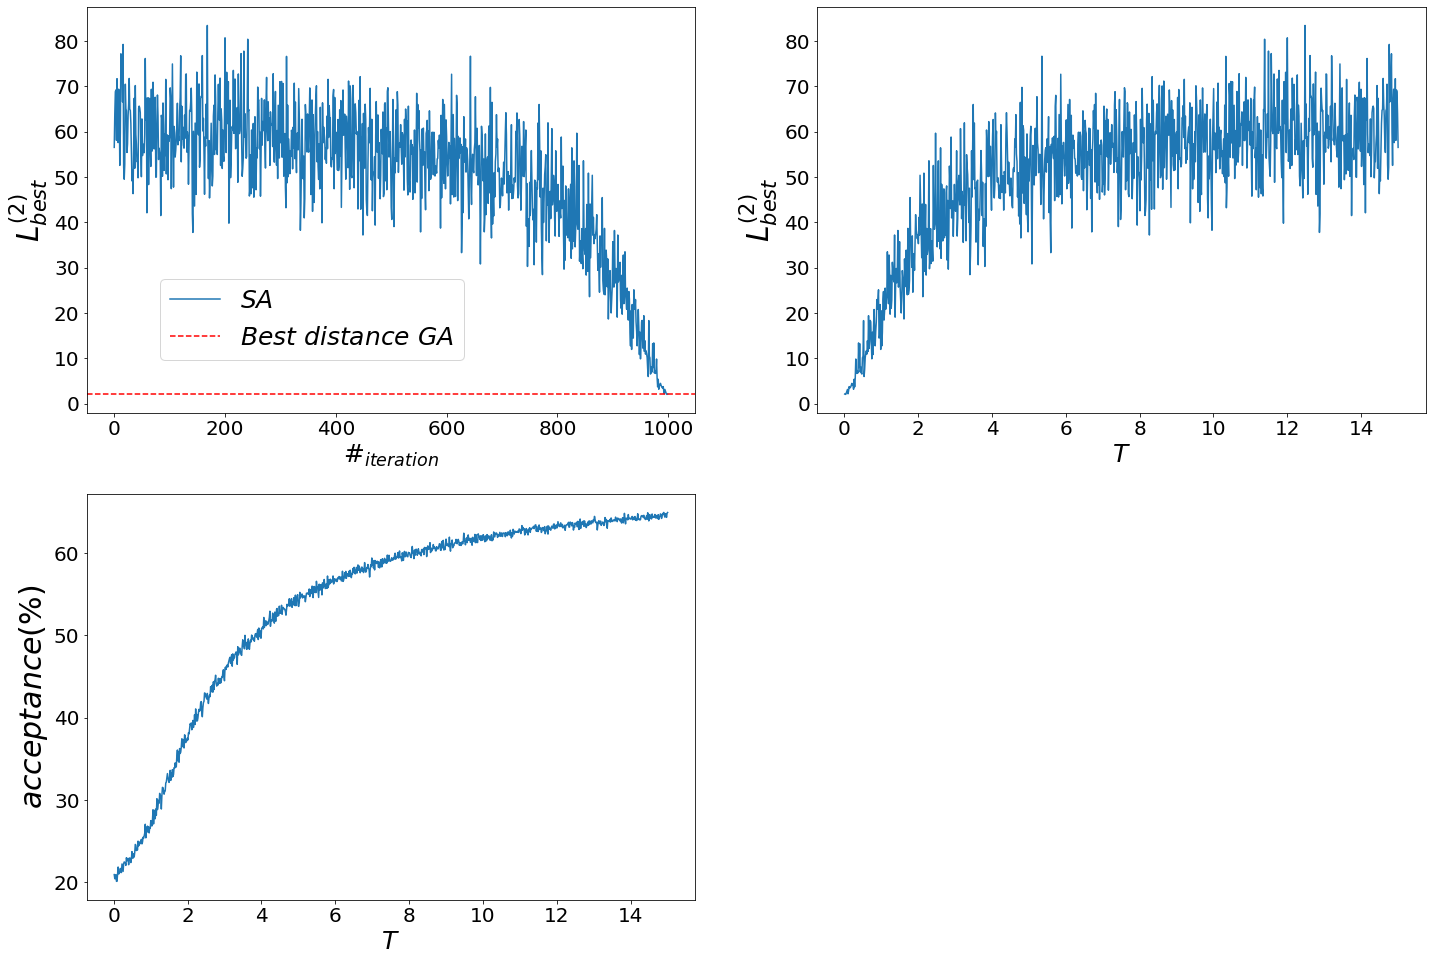

In [119]:
plt.figure(figsize=(24, 16))

iteration, distance = np.loadtxt("10.1/Circonferenza/iteration&distance.dat", usecols=(0, 1), delimiter=' ', unpack='true')

plt.subplot(2,2,1)
plt.plot(iteration, distance, label='$SA$')
plt.xlabel("$\#_{iteration}$", fontsize=25)
plt.ylabel('$L^{(2)}_{best}$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=1.99175, label='$Best$ $distance$ $GA$', color='red', linestyle='--')
 
plt.legend(fontsize=25, loc='lower left', bbox_to_anchor=(0.1, 0.1))

 
plt.subplot(2,2,2)
temp, distance = np.loadtxt("10.1/Circonferenza/temp&distance.dat", usecols=(0, 1), delimiter=' ', unpack='true')

plt.plot(temp, distance)
plt.xlabel("$T$", fontsize=25)
plt.ylabel('$L^{(2)}_{best}$', fontsize=30)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.subplot(2,2,3)

temp, accept = np.loadtxt("10.1/Circonferenza/temp&acceptance.dat", usecols=(0, 1), delimiter=' ', unpack='true')

plt.plot(temp, accept/100)
plt.xlabel("$T$", fontsize=25)
plt.ylabel('$acceptance(\%)$', fontsize=30)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.show()

Riportiamo di seguito il cromosoma migliore ottenuto utilizzando il Simulated Annealing e l'Algoritmo Genetico.

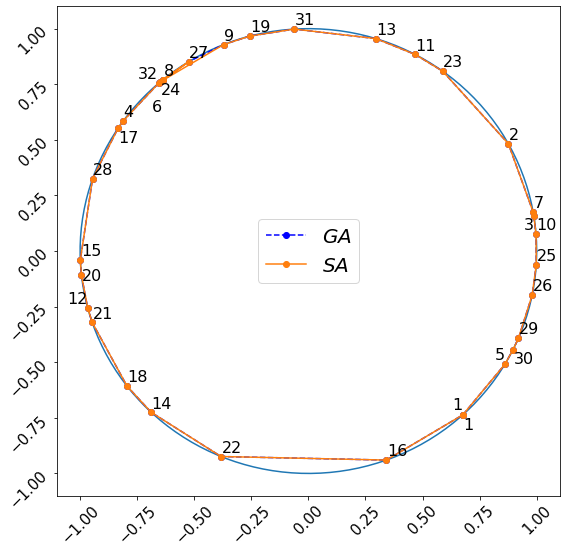

In [120]:
plt.figure(figsize=(9,9))

coord_x, coord_y = np.loadtxt("10.1/Circonferenza/Best_cromosoma_finaleGA.dat", usecols=(0, 1), delimiter=' ', unpack='true', skiprows=1)
name = np.loadtxt("10.1/Circonferenza/Best_cromosoma_finaleGA.dat", dtype=int, usecols=(2), delimiter=' ', unpack='true', skiprows=1)

coord1_x, coord1_y = np.loadtxt("10.1/Circonferenza/Cromosoma_finale.dat", usecols=(0, 1), delimiter=' ', unpack='true', skiprows=1)

angle = np.linspace( 0 , 2 * np.pi , 150 ) 
radius = 1 
x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
plt.plot(x, y, color ='#1f77b4') 

plt.plot(coord_x, coord_y, '-o', color='blue', label='$GA$', linestyle='--')
plt.plot(coord1_x, coord1_y, '-o', color='#ff7f0e', label='$SA$')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15,rotation=45)
texts = [plt.text(coord_x[i], coord_y[i], name[i], fontsize=16) for i in range(len(coord_x))]
adjust_text(texts)

plt.legend(fontsize=20)

plt.show()

In [121]:
first = np.loadtxt('10.1/Circonferenza/Cromosoma_iniziale.dat', max_rows=1, unpack='true')
last= np.loadtxt('10.1/Circonferenza/Cromosoma_finale.dat', max_rows=1, unpack='true')
last1= np.loadtxt('10.1/Circonferenza/Best_cromosoma_finaleGA.dat', max_rows=1, unpack='true')

print('Distanza iniziale:', (first)) 
print('Distanza finale SA:', (last)) 
print('Distanza finale GA:', (last1)) 

Distanza iniziale: 47.705
Distanza finale SA: 2.0944
Distanza finale GA: 1.99175


##### Città poste nel quadrato

Come nel caso della circonferenza riportiamo i grafici ottenuti. Dal primo grafico vediamo che il percorso migliore ottenuto dal Simulated Annealing converge anche in questo caso a quello dell'Algoritmo Genetico. Nel secondo e nel terzo grafico ritroviamo gli andamenti descritti in precedenza.

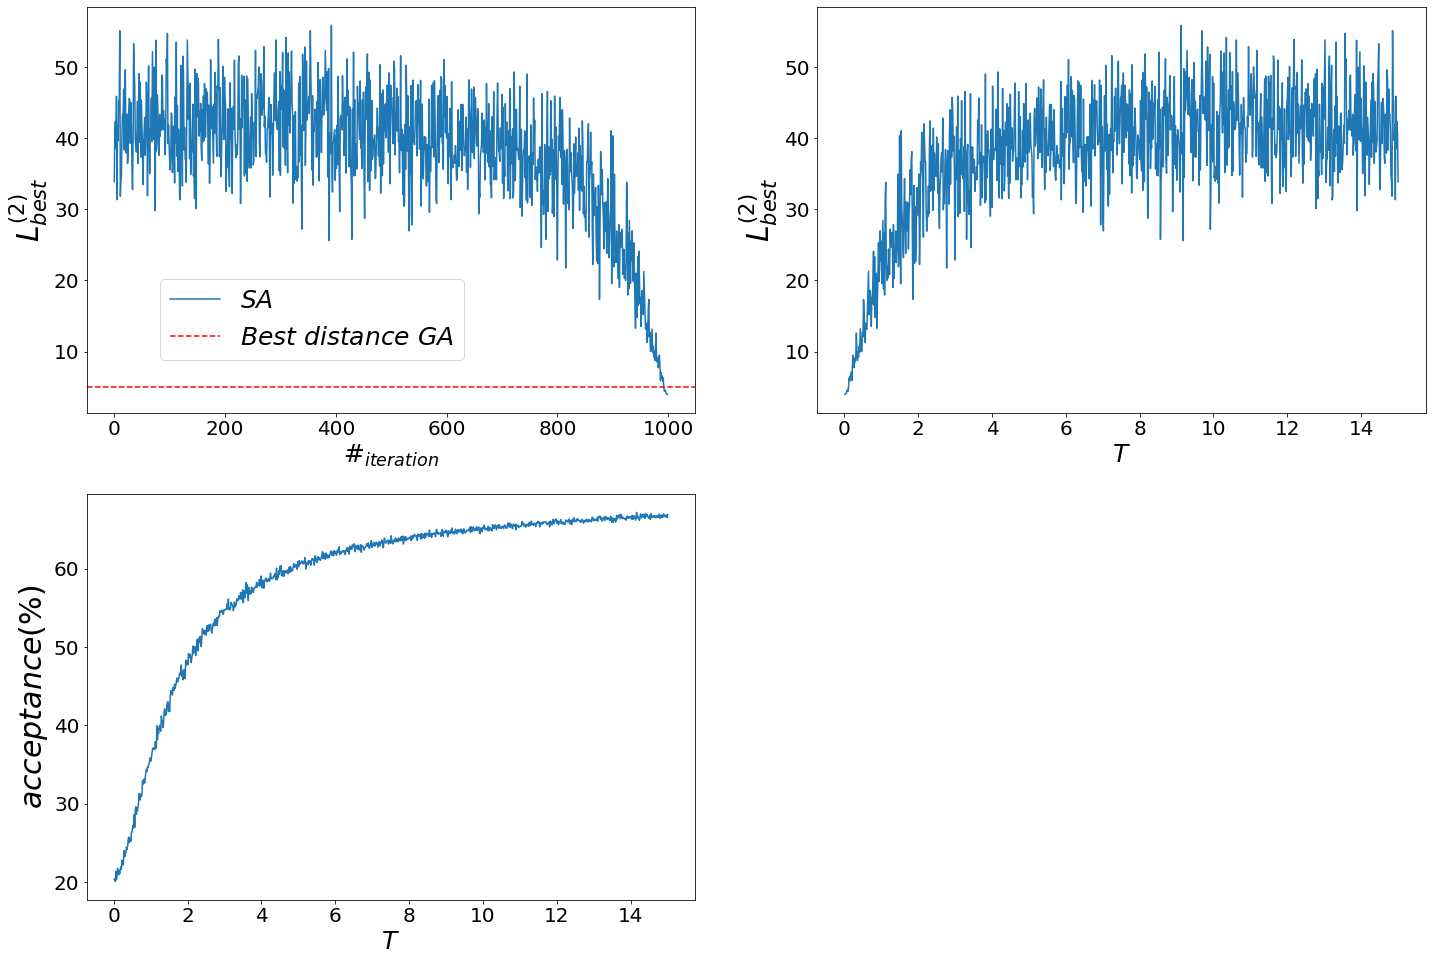

In [122]:
plt.figure(figsize=(24, 16))

iteration, distance = np.loadtxt("10.1/Quadrato/iteration&distance.dat", usecols=(0, 1), delimiter=' ', unpack='true')

plt.subplot(2,2,1)
plt.plot(iteration, distance, label='$SA$')
plt.xlabel("$\#_{iteration}$", fontsize=25)
plt.ylabel('$L^{(2)}_{best}$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=4.96647, label='$Best$ $distance$ $GA$', color='red', linestyle='--')
 
plt.legend(fontsize=25, loc='lower left', bbox_to_anchor=(0.1, 0.1))
 

plt.subplot(2,2,2)
temp, distance = np.loadtxt("10.1/Quadrato/temp&distance.dat", usecols=(0, 1), delimiter=' ', unpack='true')

plt.plot(temp, distance)
plt.xlabel("$T$", fontsize=25)
plt.ylabel('$L^{(2)}_{best}$', fontsize=30)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.subplot(2,2,3)

temp, accept = np.loadtxt("10.1/Quadrato/temp&acceptance.dat", usecols=(0, 1), delimiter=' ', unpack='true')

plt.plot(temp, accept/100)
plt.xlabel("$T$", fontsize=25)
plt.ylabel('$acceptance(\%)$', fontsize=30)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.show()

Riportiamo di seguito il cromosoma migliore ottenuto con i due metodi utilizzati. 

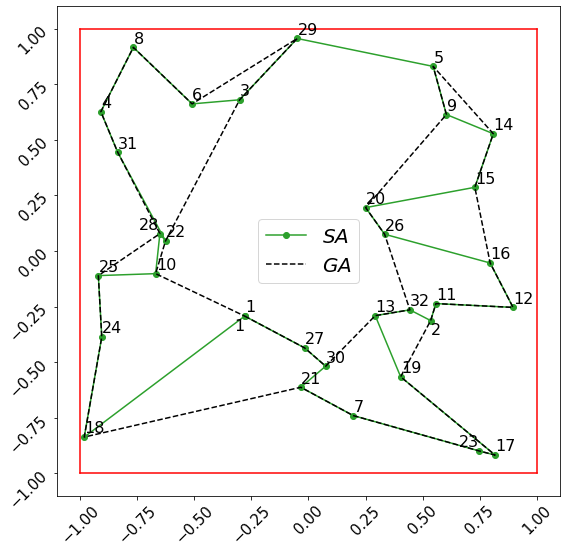

In [123]:
plt.figure(figsize=(9,9))

coord_x, coord_y = np.loadtxt("10.1/Quadrato/Best_cromosoma_finaleGA.dat", usecols=(0, 1), delimiter=' ', unpack='true', skiprows=1)
name = np.loadtxt("10.1/Quadrato/Best_cromosoma_finaleGA.dat", dtype=int, usecols=(2), delimiter=' ', unpack='true', skiprows=1)

coord1_x, coord1_y = np.loadtxt("10.1/Quadrato/Cromosoma_finale.dat", usecols=(0, 1), delimiter=' ', unpack='true', skiprows=1)

x=np.arange(-1., 1.1, 0.1)
y=np.ones(len(x))

plt.plot(x,y,c='red') 
plt.plot(x,-y,c='red')
plt.plot(y,x,c='red')
plt.plot(-y,x,c='red')

plt.plot(coord1_x, coord1_y, '-o', color='#2ca02c', label='$SA$')
plt.plot(coord_x, coord_y, '--', color='black', label='$GA$')


plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15,rotation=45)
texts = [plt.text(coord_x[i], coord_y[i], name[i], fontsize=16) for i in range(len(coord_x))]
adjust_text(texts)

plt.legend(fontsize=20)

plt.show()

In [124]:
first = np.loadtxt('10.1/Quadrato/Cromosoma_iniziale.dat', max_rows=1, unpack='true')
last= np.loadtxt('10.1/Quadrato/Cromosoma_finale.dat', max_rows=1, unpack='true')
last1= np.loadtxt('10.1/Quadrato/Best_cromosoma_finaleGA.dat', max_rows=1, unpack='true')


print('Distanza iniziale:', (first)) 
print('Distanza finale SA:', (last)) 
print('Distanza finale GA:', (last1))

Distanza iniziale: 34.7134
Distanza finale SA: 3.97232
Distanza finale GA: 4.96647


### Esercizio 10.2

In questo esercizio parallelizziamo tramite le librerie MPI il codice dell'Algoritmo Genetico così da risolvere il problema del commesso viaggiatore utilizzando 4 nodi che cercano contemporaneamete il percorso migliore. Ogni nodo fa una ricerca indipendente del percorso migliore, ma ogni $N_{switch}=20$ generazioni due nodi scelti a caso si scambiano il cromosoma migliore che hanno. Utilizziamo a tale scopo le funzioni MPI_Send e MPI_Receive per le comunicazioni bidirezionali, che ci permettono di inviare dati tra un nodo e l'altro. Come nell'esercizio precedente consideriamo le medesime posizioni dell'Esercitazione 9 così da poter fare un confronto sui risultati ottenuti, manteniamo inoltre gli stessi valori delle variabili utilizzate all'interno del codice (numero di generazioni, lunghezza della popolazione, probabilità con cui vengono chiamate le mutazioni). Poiché le funzioni di $Send$ e $Receive$ hanno la possibilità di scambiare soltanto dei dati di tipo ben definito come interi, double o float e non dati come le classi decidiamo di scambiare tra i nodi il vettore di alleli (e quindi di interi) che rappresentano il percorso migliore e di ricreare successivamente il cromosoma con le rispettive posizioni implementando un apposito costruttore.

Applichiamo il codice parallelizzato per risolvere il problema del commesso viaggiatore nel caso di $32$ città poste all'interno di un quadrato di lato due. Riportiamo di seguito i grafici ottenuti tramite le simulazioni. 

Nel primo grafico riportiamo il valore del modulo quadro della distanza istantanea migliore in dipendenza della generazione per ogni nodo, nel secondo grafico riportiamo il valor medio del modulo quadro della distanza mediato sulla popolazione per ogni nodo. Dai grafici vediamo che tutti i nodi convergono ad una stessa soluzione.

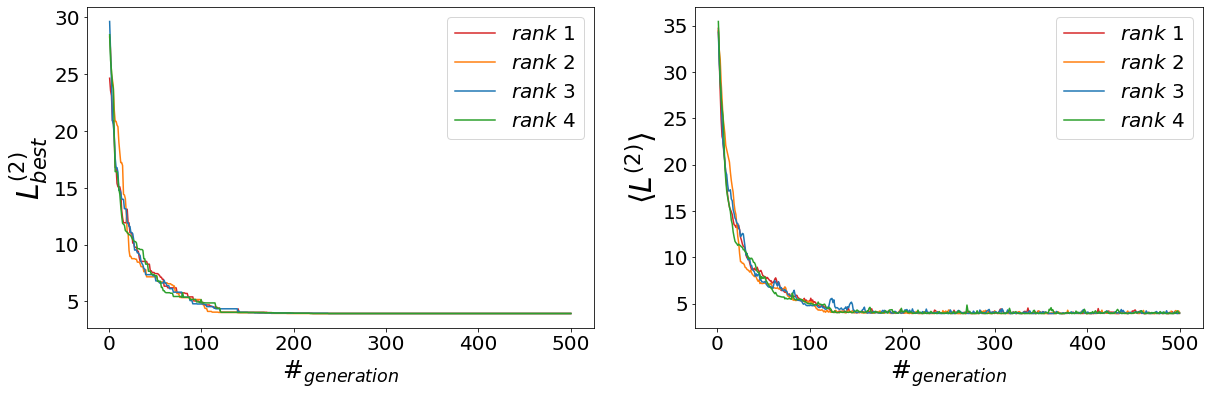

In [125]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)


generation, L2_rank1  = np.loadtxt("10.2/L2_rank1.dat", usecols=(0, 1), delimiter=' ', unpack='true')
L2_rank2  = np.loadtxt("10.2/L2_rank2.dat", usecols=(1), delimiter=' ', unpack='true')
L2_rank3  = np.loadtxt("10.2/L2_rank3.dat", usecols=(1), delimiter=' ', unpack='true')
L2_rank4  = np.loadtxt("10.2/L2_rank4.dat", usecols=(1), delimiter=' ', unpack='true')


plt.plot(generation, L2_rank1, label='$rank$ $1$', c='#d62728')
plt.plot(generation, L2_rank2, label='$rank$ $2$', c='#ff7f0e')
plt.plot(generation, L2_rank3, label='$rank$ $3$', c='#1f77b4')
plt.plot(generation, L2_rank4, label='$rank$ $4$', c='#2ca02c')

plt.xlabel("$\#_{generation}$", fontsize=25)
plt.ylabel('$L^{(2)}_{best}$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.subplot(2,2,2)

generation, L2_rank1  = np.loadtxt("10.2/aveL2_rank1.dat", usecols=(0, 1), delimiter=' ', unpack='true')
L2_rank2  = np.loadtxt("10.2/aveL2_rank2.dat", usecols=(1), delimiter=' ', unpack='true')
L2_rank3  = np.loadtxt("10.2/aveL2_rank3.dat", usecols=(1), delimiter=' ', unpack='true')
L2_rank4  = np.loadtxt("10.2/aveL2_rank4.dat", usecols=(1), delimiter=' ', unpack='true')


plt.plot(generation, L2_rank1, label='$rank$ $1$', c='#d62728')
plt.plot(generation, L2_rank2, label='$rank$ $2$', c='#ff7f0e')
plt.plot(generation, L2_rank3, label='$rank$ $3$', c='#1f77b4')
plt.plot(generation, L2_rank4, label='$rank$ $4$', c='#2ca02c')

plt.xlabel("$\#_{generation}$", fontsize=25)
plt.ylabel('$\\langle L^{(2)}\\rangle$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)



plt.show()

Di seguito riportiamo il percorso migliore ottenuto dai quattro nodi confrontato con il percorso migliore ottenuto nell'Esercitazione 9. Dai risultati ottenuti vediamo che tutti i nodi trovano uno stesso percorso migliore e che il codice parallelizzato su quattro nodi con scambi di informazione tra un nodo e l'altro ottiene un valore della distanza minore rispetto al risultato ottenuto tramite il codice non parallelizzato.

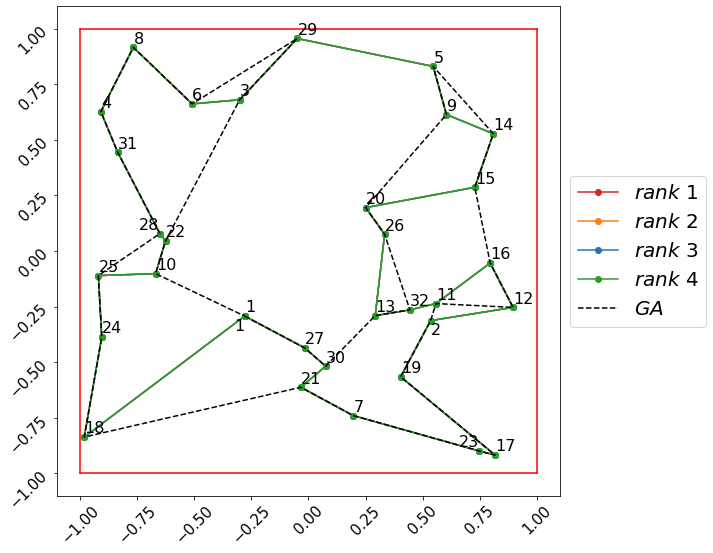

In [126]:
plt.figure(figsize=(9,9))

coord1, coord2 = np.loadtxt("10.2/Best_cromosoma_finaleGA.dat", usecols=(0, 1), skiprows=1, delimiter=' ', unpack='true')

coord_x, coord_y = np.loadtxt("10.2/Best_crom_rank1.dat", usecols=(0, 1), delimiter=' ', unpack='true')
name = np.loadtxt("10.2/Best_crom_rank1.dat", dtype=int, usecols=(2), delimiter=' ', unpack='true')

coord1_x, coord1_y = np.loadtxt("10.2/Best_crom_rank2.dat", usecols=(0, 1), delimiter=' ', unpack='true')
coord2_x, coord2_y = np.loadtxt("10.2/Best_crom_rank3.dat", usecols=(0, 1), delimiter=' ', unpack='true')
coord3_x, coord3_y = np.loadtxt("10.2/Best_crom_rank4.dat", usecols=(0, 1), delimiter=' ', unpack='true')

x=np.arange(-1., 1.1, 0.1)
y=np.ones(len(x))

plt.plot(x,y,c='red') 
plt.plot(x,-y,c='red')
plt.plot(y,x,c='red')
plt.plot(-y,x,c='red')

plt.plot(coord_x, coord_y, '-o', label='$rank$ $1$', c='#d62728')
plt.plot(coord1_x, coord1_y, '-o', label='$rank$ $2$', c='#ff7f0e')
plt.plot(coord2_x, coord2_y, '-o', label='$rank$ $3$', c='#1f77b4')
plt.plot(coord3_x, coord3_y, '-o', label='$rank$ $4$', c='#2ca02c')
plt.plot(coord1, coord2, '--', label='$GA$', c='black')


plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15,rotation=45)
texts = [plt.text(coord_x[i], coord_y[i], name[i], fontsize=16) for i in range(len(coord_x))]
adjust_text(texts)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) ,fontsize=20)

plt.show()

In [127]:
lines = 0
with open('10.2/L2_rank1.dat') as f:
    for line in f:
        lines = lines + 1

first = np.loadtxt('10.2/L2_rank1.dat', skiprows=lines-1, unpack='true', usecols=1)
first1 = np.loadtxt('10.2/L2_rank2.dat', skiprows=lines-1, unpack='true', usecols=1)
first2 = np.loadtxt('10.2/L2_rank3.dat', skiprows=lines-1, unpack='true', usecols=1)
first3 = np.loadtxt('10.2/L2_rank4.dat', skiprows=lines-1, unpack='true', usecols=1)
distance = np.loadtxt("10.2/Best_cromosoma_finaleGA.dat", max_rows=1, unpack='true')

print('Distanza finale rank 1:', first)
print('Distanza finale rank 2:', first1) 
print('Distanza finale rank 3:', first2) 
print('Distanza finale rank 4:', first3) 
print('Distanza finale GA:', distance)

Distanza finale rank 1: 3.93232
Distanza finale rank 2: 3.93232
Distanza finale rank 3: 3.93232
Distanza finale rank 4: 3.93232
Distanza finale GA: 4.96647
